In [1]:
!nvidia-smi

Sun Jun 23 06:33:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


## Custom Training

In [6]:
%cd /content/drive/MyDrive/Colab Notebooks
!yolo task=detect mode=train model=yolov8m.pt data=data.yaml epochs=25 imgsz=640 plots=True

/content/drive/MyDrive/Colab Notebooks
100% 49.7M/49.7M [00:00<00:00, 210MB/s]
New https://pypi.org/project/ultralytics/8.2.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buff

In [7]:
!ls runs/detect/train

args.yaml					    PR_curve.png	 train_batch2402.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1719124561.a27d1c1c300a.1749.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					    train_batch2400.jpg  weights
P_curve.png					    train_batch2401.jpg


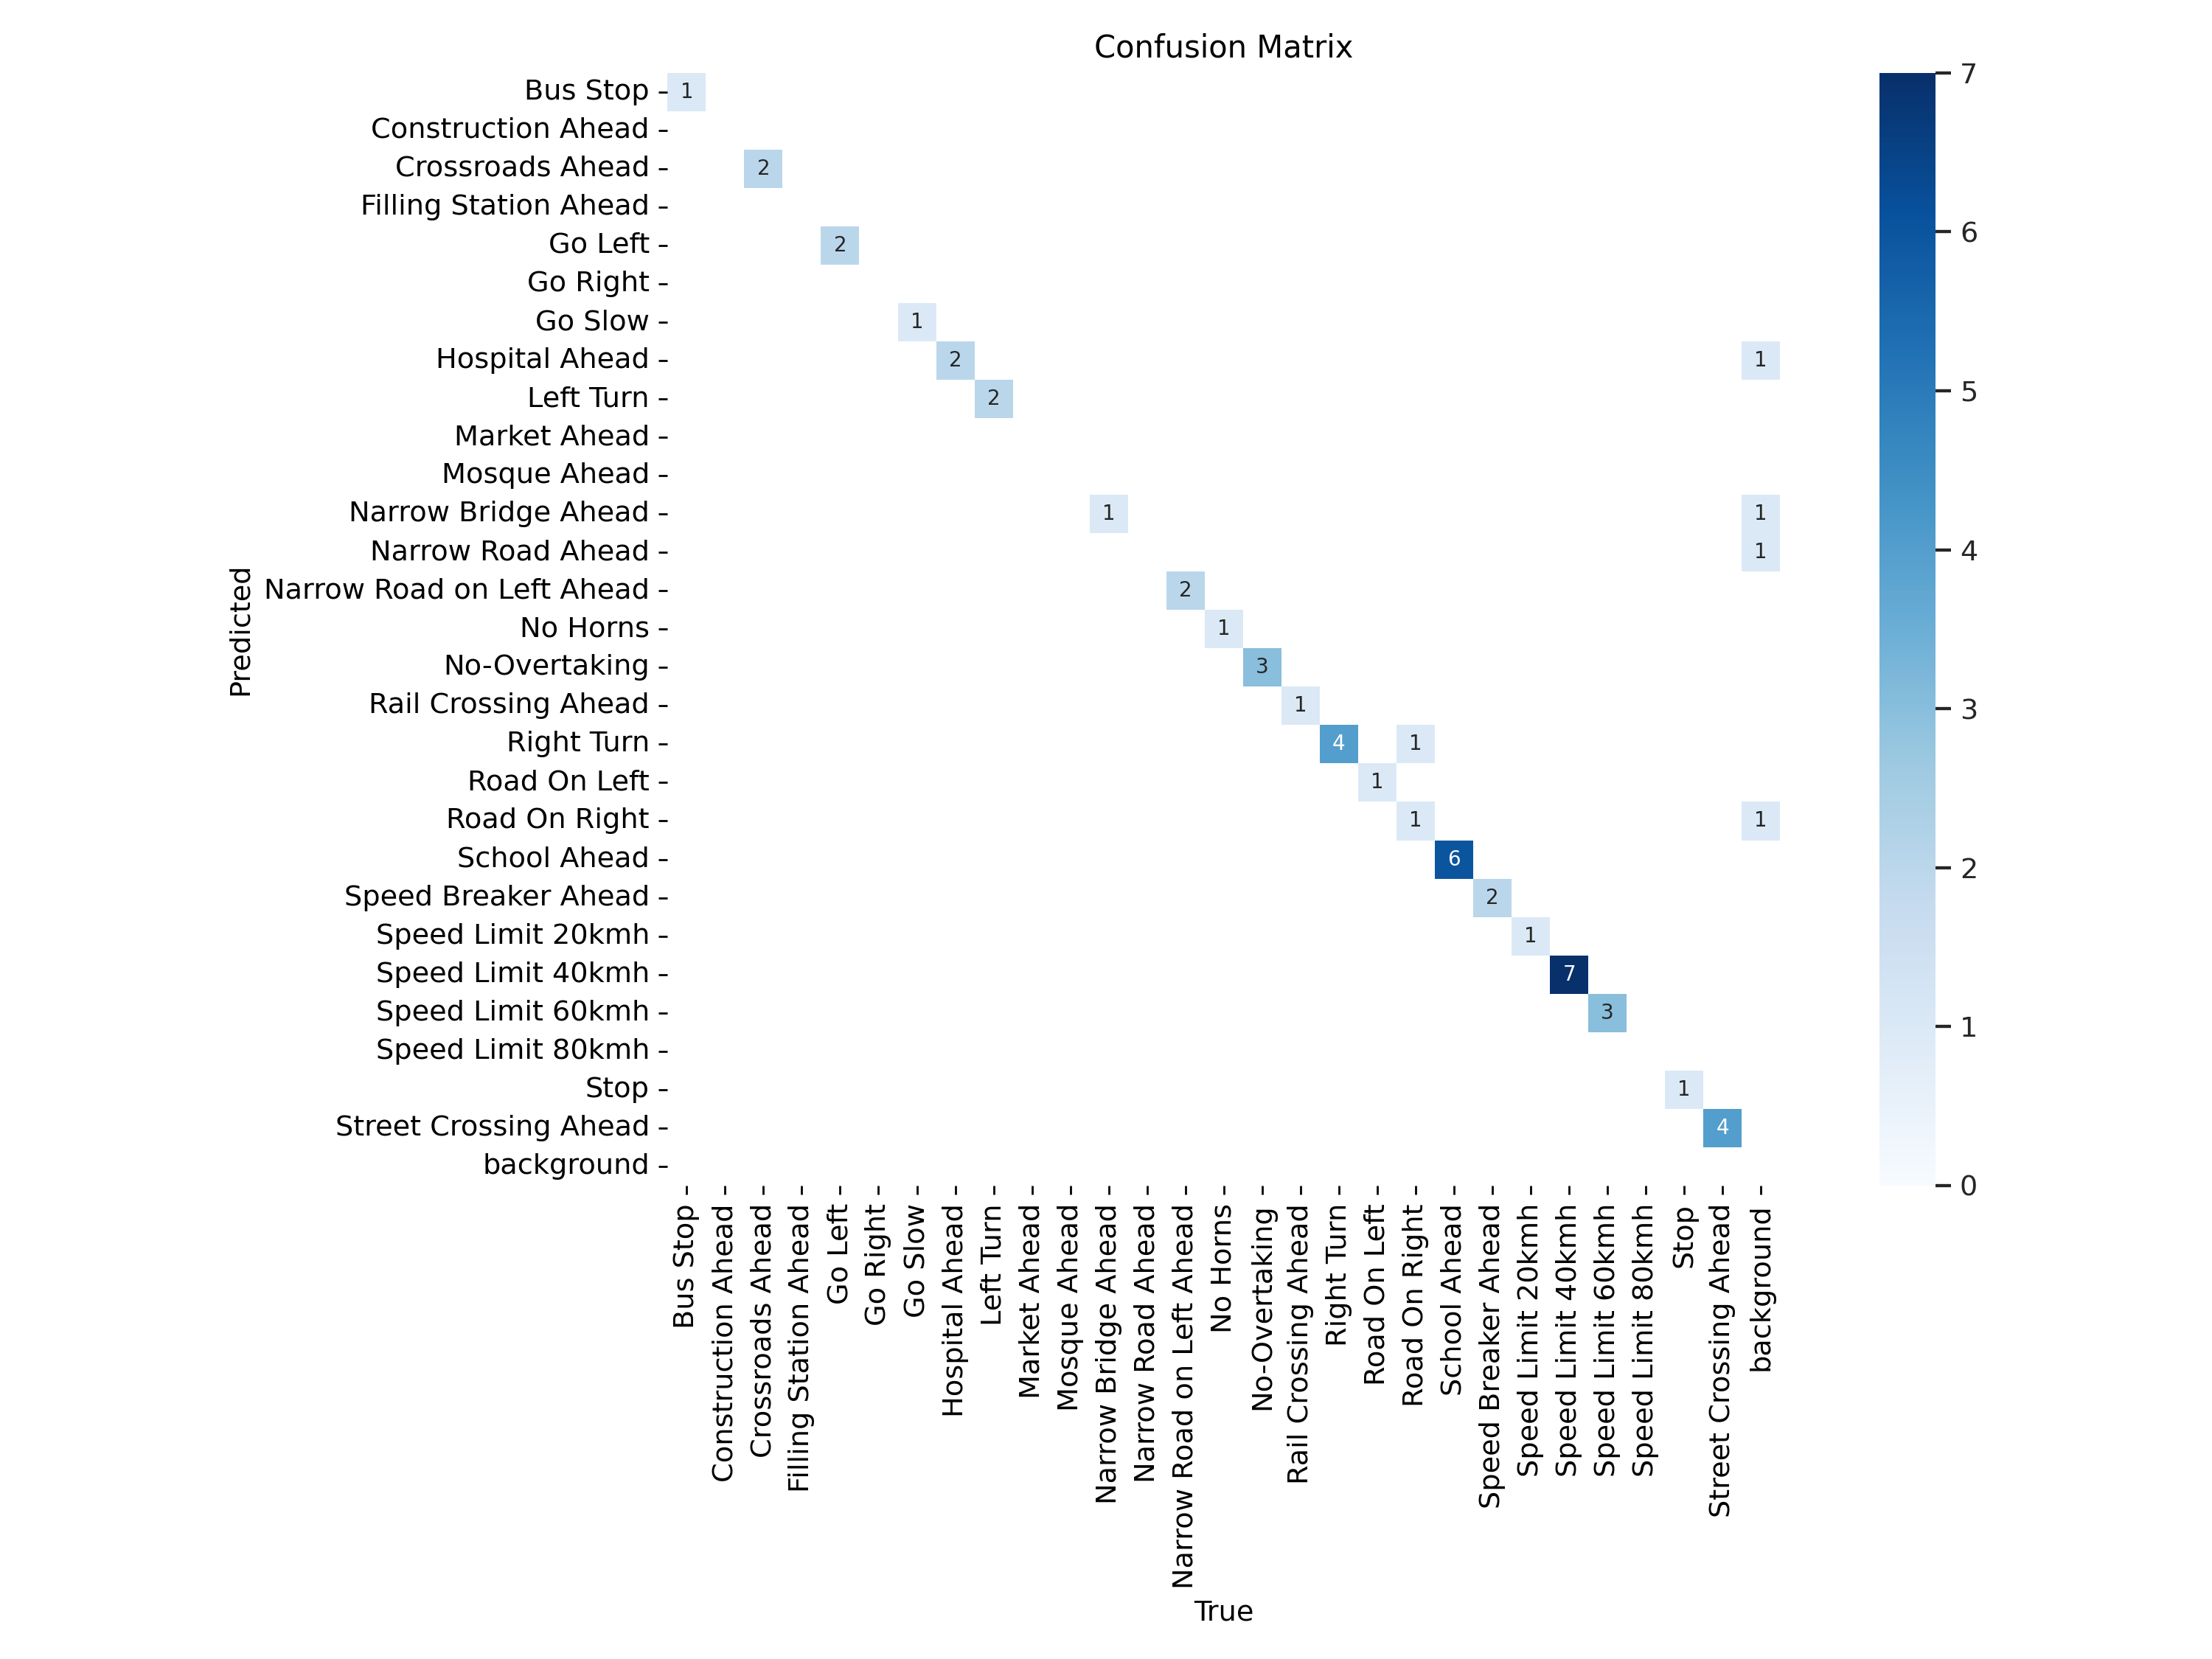

In [8]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

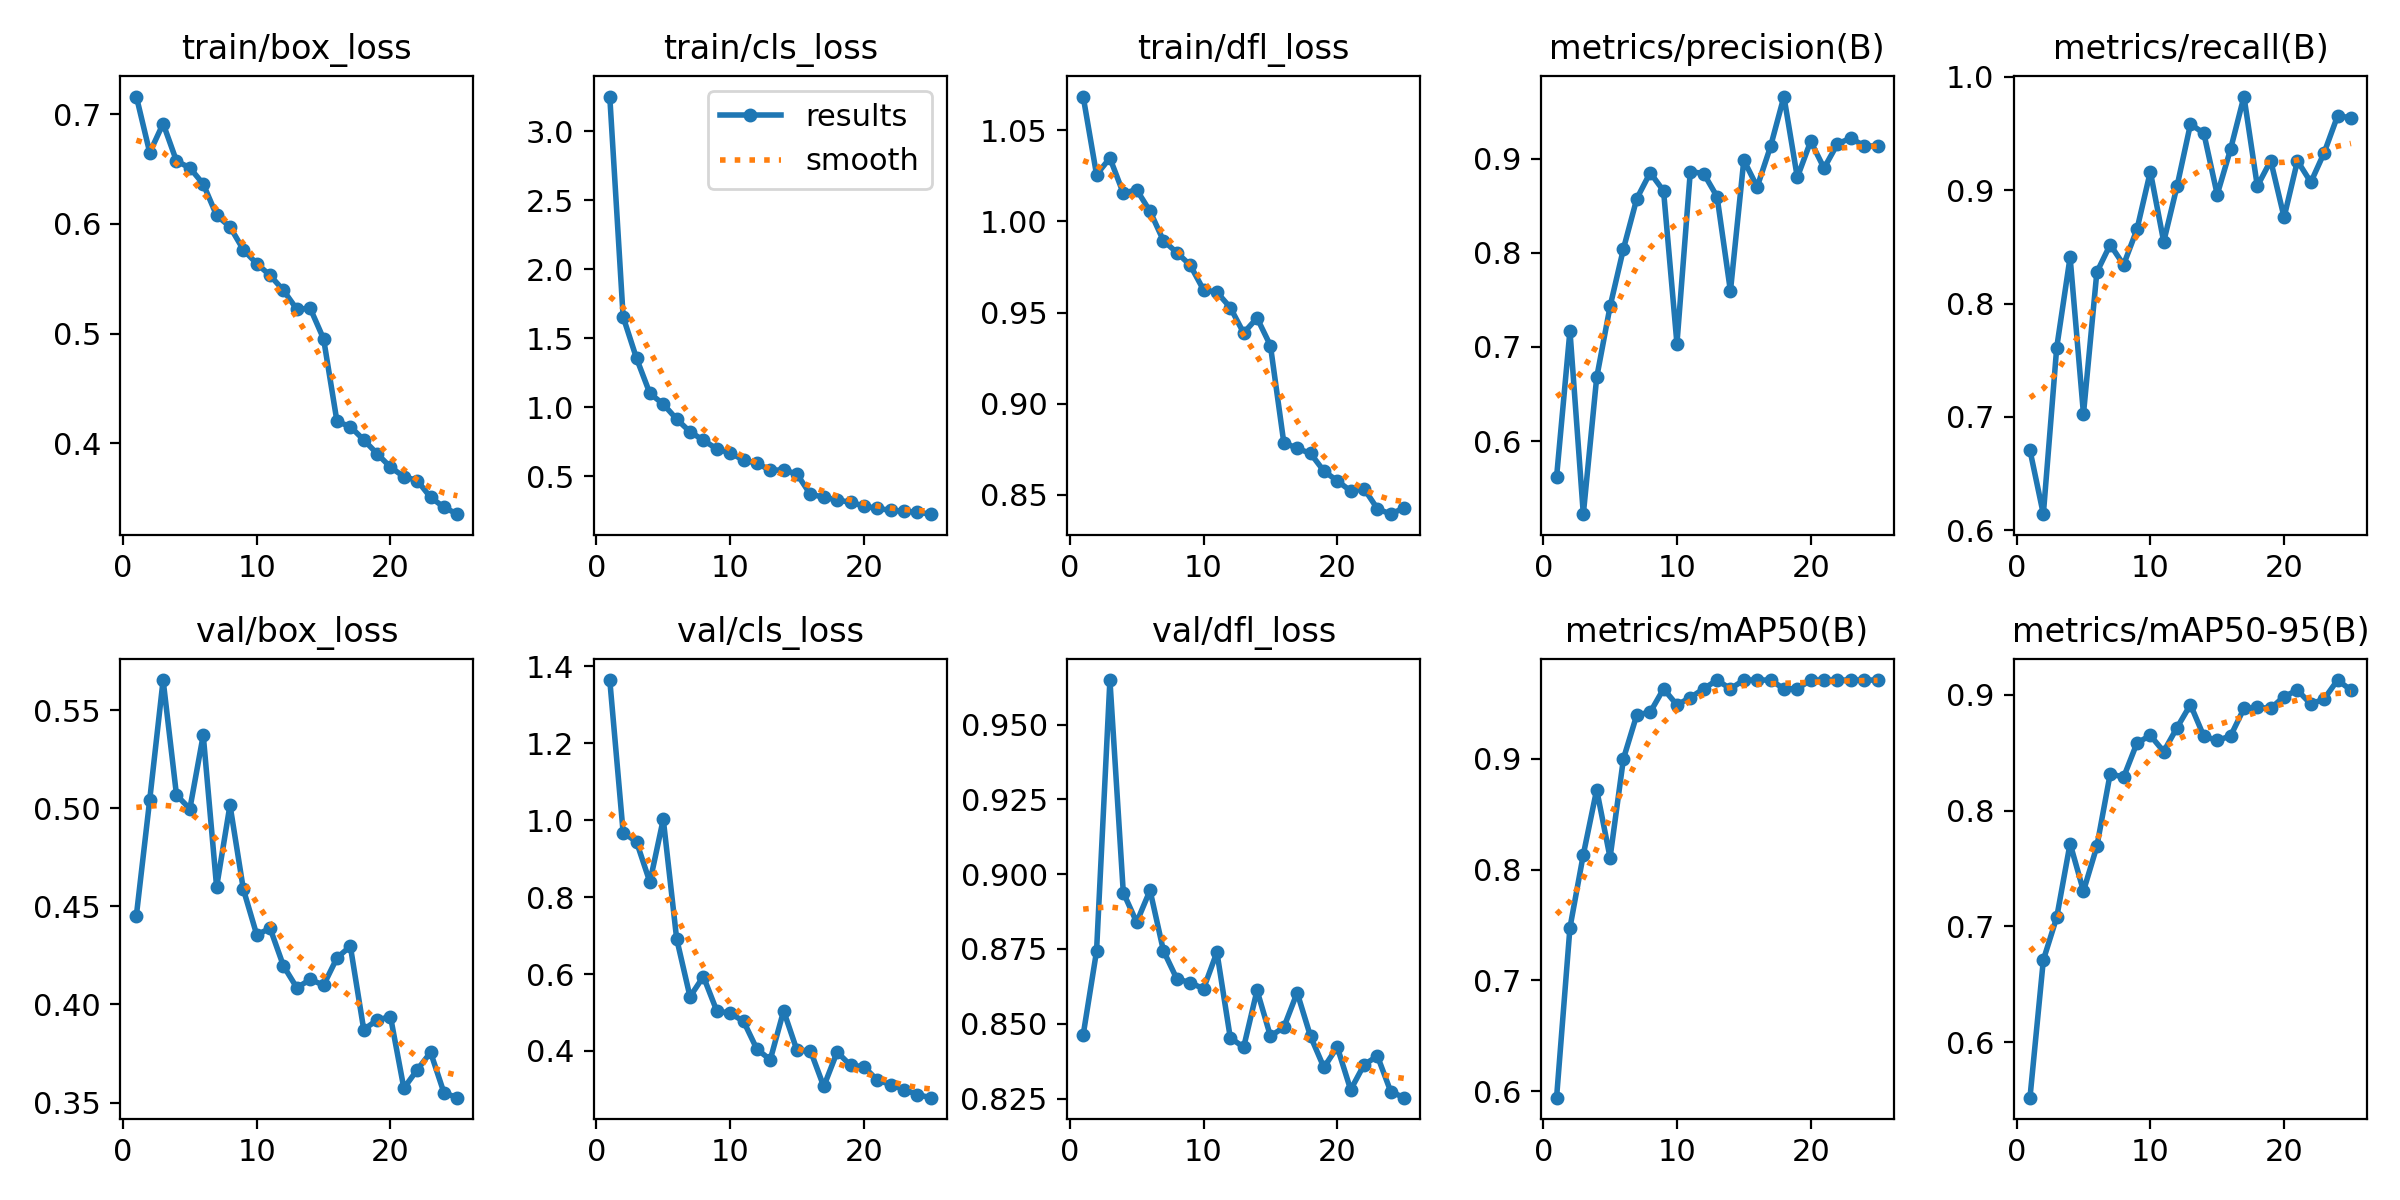

In [9]:
Image(filename='runs/detect/train/results.png', width=600)

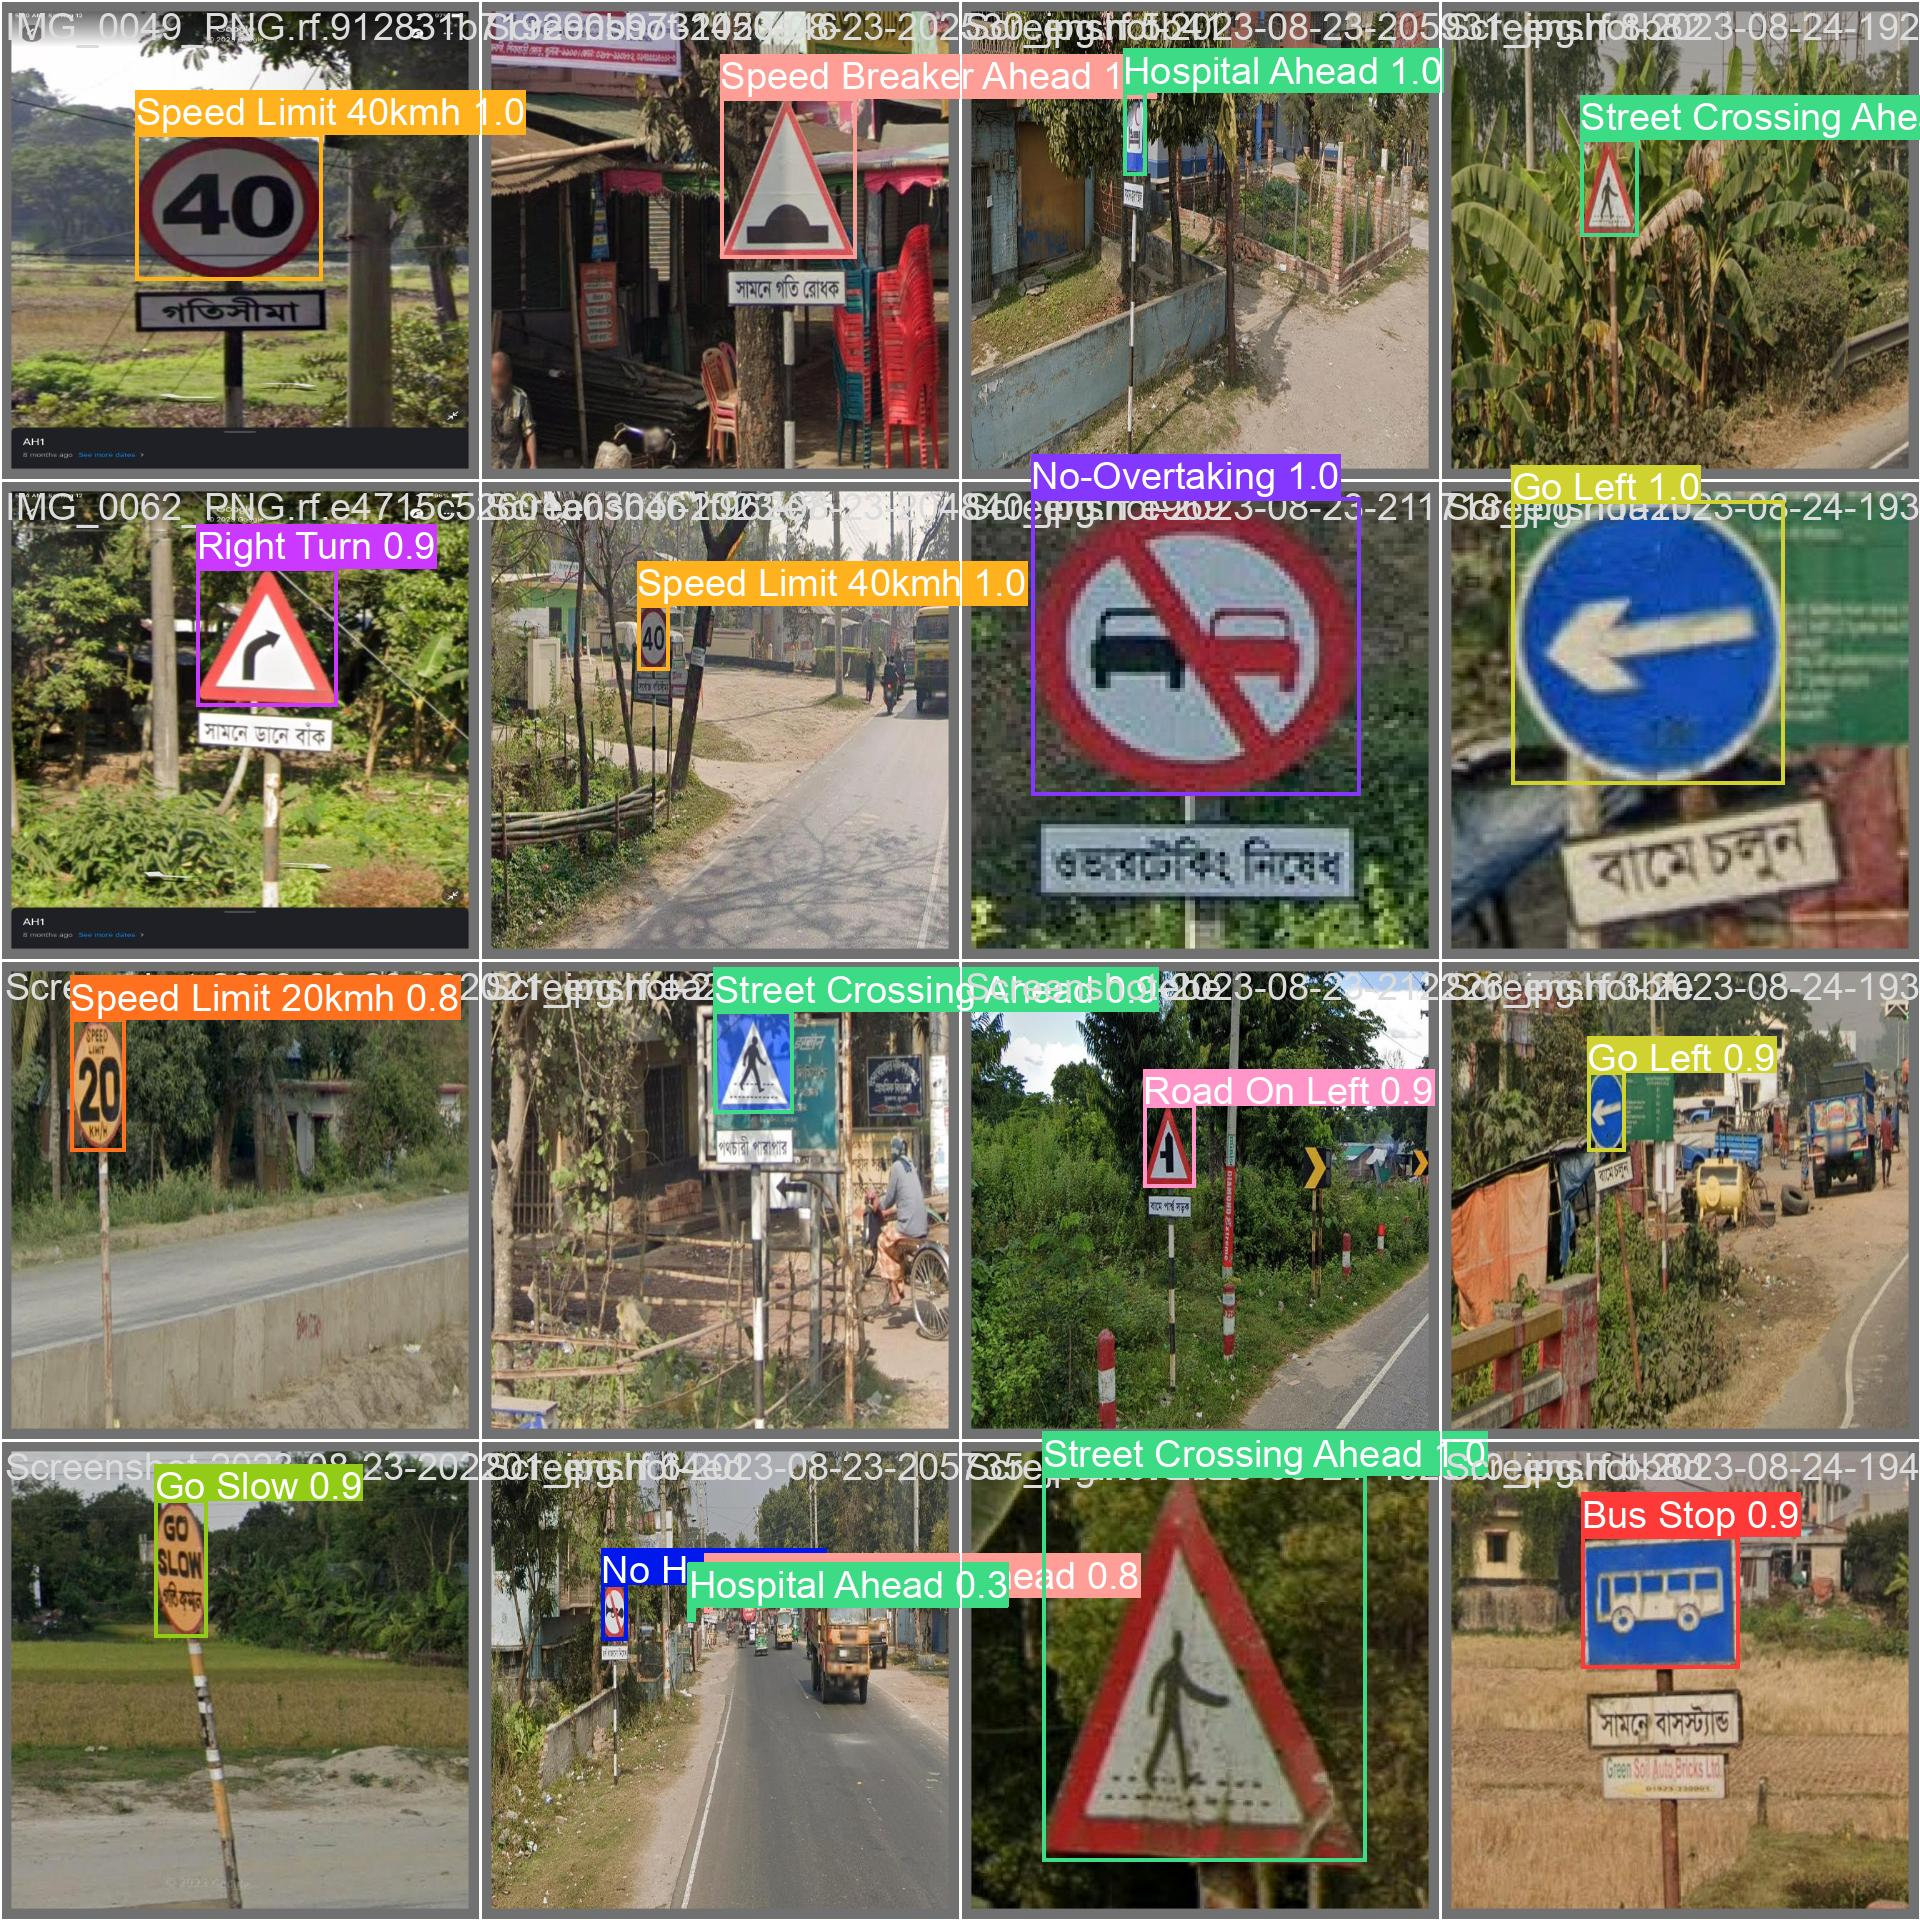

In [10]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25855972 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/dataset/valid/labels.cache... 46 images, 0 backgrounds, 0 corrupt: 100% 46/46 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/3 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.42s/it]
                   all         46         49      0.888      0.574       0.59      0.571
              Bus Stop         46          1          0          0          0          0
      Crossroads Ahead         46          2      0.947          1      0.995      0.949
               Go Left         46          2          1          0          0          0
               Go Slow         46          1  

## Inference with Custom Model

In [12]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=dataset/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25855972 parameters, 0 gradients, 78.8 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/48 /content/drive/MyDrive/Colab Notebooks/dataset/test/images/IMG_0026_PNG.rf.7c7f008ae721f06eb25688fb54beaddb.jpg: 640x640 1 Speed Limit 40kmh, 37.2ms
image 2/48 /content/drive/MyDrive/Colab Notebooks/dataset/test/images/IMG_0055_PNG.rf.8e2037142b302388508bada09715736b.jpg: 640x640 1 Road On Left, 37.2ms
image 3/48 /content/drive/MyDrive/Colab Notebooks/dataset/test/images/IMG_0061_PNG.rf.e1e5e8e560b21d3166faa6e9ba5196ed.jpg: 640x640 1 Right Turn, 37.3ms
image 4/48 /content/drive/MyDrive/Colab Notebooks/dataset/test/images/Screenshot-2023-08-23-201056_jpg.rf.f338087bb3ced2ae099a8a0acf6d5252.jpg: 640x640 1 Go Slow, 37.2ms
image 5/48 /content/drive/MyDrive/Colab Notebooks/dataset/test/images/Screenshot-2023-08-23-203139_jpg.rf.f63f5cdedc032633e6ef3f9fb10be401.jpg: 640x64

**NOTE:** Let's take a look at few results.

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [18]:
!yolo task=detect mode=predict model=/runs/detect/train/weights/best.pt conf=-0.25 source=/content/drive/MyDrive/Colab Notebooks/video/video.mp4

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 382, in entrypoint
    check_dict_alignment(full_args_dict, {a: ''})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 203, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'Notebooks/video/video.mp4' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=predict', 'model=/runs/detect/train/weights/best.pt', 'conf=-0.25', 'source=/content/drive/MyDrive/Colab', 'Notebooks/video/video.mp4']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are an